In [3]:
'''
The target variable Diabetes_012 has 3 classes: 
    0 is for no diabetes or only during pregnancy
    1 is for prediabetes
    2 is for diabetes 
There is class imbalance in this dataset.
This dataset has 21 feature variables.
'''
import pandas as pd

cf = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
cf

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
# Logistic Regression for three classes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = cf.drop('Diabetes_012', axis=1)
y = cf['Diabetes_012']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#multinomial for three classes
model = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=2000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.644374802901293
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42798
         1.0       0.03      0.31      0.05       873
         2.0       0.36      0.59      0.44      7065

    accuracy                           0.64     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.64      0.72     50736



In [15]:
# KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k_value = 5 
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.831953642384106
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     42798
         1.0       0.04      0.00      0.00       873
         2.0       0.41      0.21      0.27      7065

    accuracy                           0.83     50736
   macro avg       0.44      0.39      0.39     50736
weighted avg       0.79      0.83      0.80     50736



Fitting DecisionTreeClassifier(max_depth=3)
Fitting BaggingClassifier(n_estimators=100)
Fitting RandomForestClassifier()
Fitting ExtraTreesClassifier()
Fitting AdaBoostClassifier(n_estimators=100)


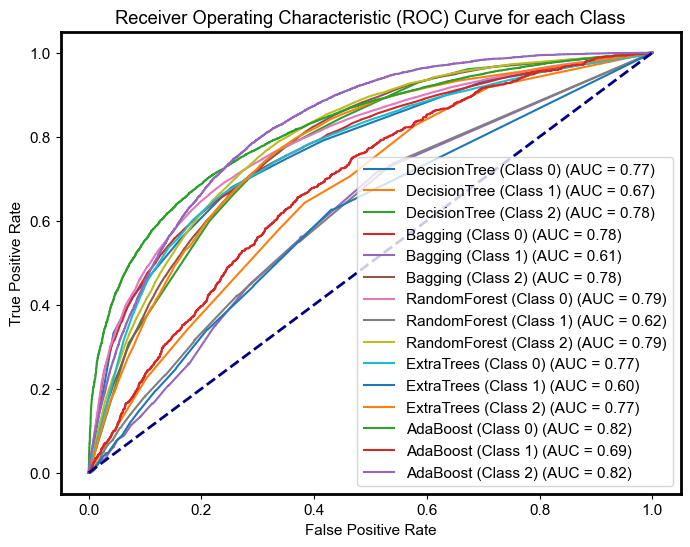

In [12]:

# Ensemble from class
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = 100

models = [DecisionTreeClassifier(max_depth=3),\
BaggingClassifier(n_estimators=n_estimators),\
RandomForestClassifier(n_estimators=n_estimators),\
ExtraTreesClassifier(n_estimators=n_estimators),\
AdaBoostClassifier(n_estimators=n_estimators)]

model_titles = ['DecisionTree', 'Bagging', 'RandomForest', 'ExtraTrees', 'AdaBoost']

surv_preds, surv_probs, scores, fprs, tprs = ([] for i in range(5))


for i, model in enumerate(models):
    print(f"Fitting {model}")
    model.fit(X_train, y_train)
    surv_probs.append(model.predict_proba(X_test))

# Plotting ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(len(model_titles)):
    for class_label in range(3):  # For the 3 classes (0, 1, 2)
        fpr, tpr, _ = roc_curve(y_test == class_label, surv_probs[i][:, class_label])
        roc_auc = auc(fpr, tpr)
        plt.plot(
            fpr, tpr,
            label=f'{model_titles[i]} (Class {class_label}) (AUC = {roc_auc:.2f})'
        )

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each Class')
plt.legend(loc='lower right')
plt.show()

In [10]:
for i, score in enumerate(scores):
    print("{0} with score {1:0.2f}".format(model_titles[i], score))